In [1]:
import numpy as np
from scipy import stats
import seaborn as sns

from stats_util import *

In [2]:
n_trials = 10000

# Probability Distribution Functions

## Uniform Distribution

Used when the probability of obtaining any given value from a given range is theoretically equal. Discrete distribution.

In [3]:
lower = 0
upper = 10

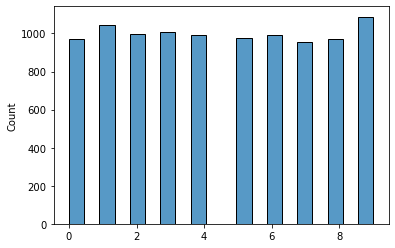

In [4]:
uniform_simulation = stats.randint(lower, upper).rvs(size = n_trials)
sns.histplot(data = uniform_simulation);

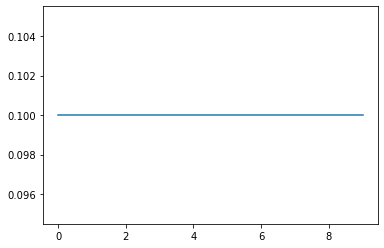

In [5]:
uniform_dist = stats.randint(lower, upper)
x = np.arange(lower, upper)
y = uniform_dist.pmf(x)
sns.lineplot(data = uniform_dist, x = x, y = y);

For a uniform distribution of a specified collection of items, use numpy.random.choice

In [6]:
np.random.choice(['heads', 'tails'])

'heads'

## Binomial Distribution

Used when we need a distribution representing a number of successes. Discrete distribution.

In [7]:
n = 5
prob_success = 0.6

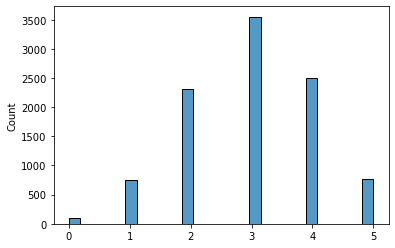

In [8]:
binomial_simulation = stats.binom(n, prob_success).rvs(size = n_trials)
sns.histplot(data = binomial_simulation);

Theoretical lowest value is 0. Theoretical highest value is n, where n is the first parameter passed to the binom class.

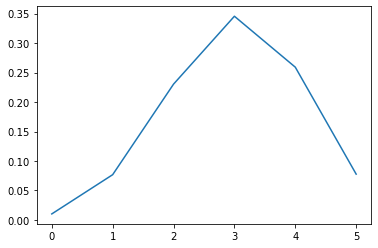

In [9]:
binomial_dist = stats.binom(n, prob_success)
x = np.arange(0, n + 1)
y = binomial_dist.pmf(x)
sns.lineplot(data = binomial_dist, x = x, y = y);

In [10]:
binomial_dist.pmf(0), binomial_dist.pmf(-1)

(0.010240000000000003, 0.0)

In [11]:
binomial_dist.pmf(n), binomial_dist.pmf(n + 1)

(0.07775999999999998, 0.0)

## Normal Distribution

Used when we are given a mean and standard deviation. Standard deviation determines the width of the distribution. Continuous distribution.

In [12]:
mean = 20
std_dev = 5

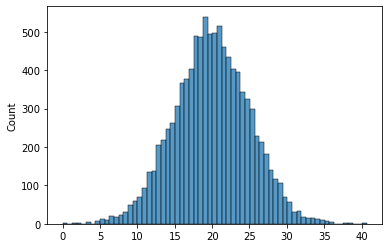

In [13]:
normal_simulation = stats.norm(mean, std_dev).rvs(size = n_trials)
sns.histplot(data = normal_simulation);

Theoretical most frequent value is the mean.

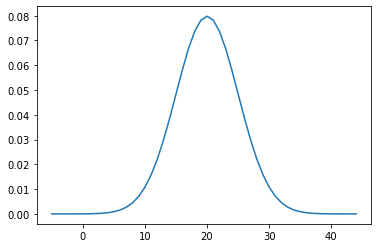

In [14]:
normal_dist = stats.norm(mean, std_dev)
x = np.arange(mean - mean - std_dev, mean + mean + std_dev)
y = normal_dist.pdf(x)
sns.lineplot(data = normal_dist, x = x, y = y);

In [15]:
normal_dist.pdf(mean), normal_dist.pdf(mean - 1), normal_dist.pdf(mean + 1)

(0.07978845608028654, 0.07820853879509118, 0.07820853879509118)

## Poisson Distribution

Used when time intervals are involved in the distribution. Discrete distribution.

In [16]:
mean = 10

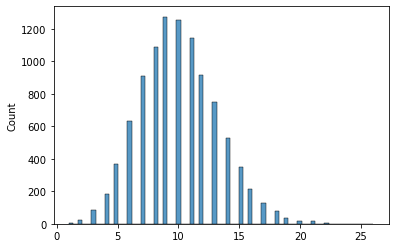

In [17]:
poisson_simulation = stats.poisson(mean).rvs(size = 10000)
sns.histplot(data = poisson_simulation);

Theoretical lowest value is 0. Theoretical highest value is infinity.

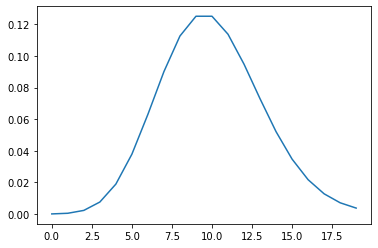

In [18]:
poisson_dist = stats.poisson(mean)
x = np.arange(0, mean * 2)
y = poisson_dist.pmf(x)
sns.lineplot(data = poisson_dist, x = x, y = y);

In [19]:
poisson_dist.pmf(0), poisson_dist.pmf(-1)

(4.5399929762484854e-05, 0.0)

In [20]:
poisson_dist.pmf(mean * 2), poisson_dist.pmf(300)

(0.0018660813139987742, 1.4834e-319)

## Working With Distributions In Scipy

rvs, pmf, pdf, cdf, ppf, sf, isf

In [21]:
uniform_dist = stats.randint(0, 10)
normal_dist = stats.norm(10, 2)

Generate random values: rvs

In [22]:
# Generate 10 random values
uniform_dist.rvs(size = 10)

array([9, 3, 3, 2, 6, 6, 6, 2, 0, 7])

Probability of generating given value: pmf, pdf

In [23]:
uniform_dist.pmf(5)

0.1

In [24]:
normal_dist.pdf(5)

0.00876415024678427

Probability of generating value less than or equal to n: cdf

In [25]:
# Probability of getting less than or equal to 8
uniform_dist.cdf(8)

0.9

What if we have the probability and want the value? ppf

In [26]:
uniform_dist.ppf(0.3)

2.0

Probability of generating value greater than n: sf

In [27]:
uniform_dist.sf(4)

0.5

What if we have the probability and want the value? isf

In [28]:
uniform_dist.isf(0.3)

6.0

What if we don't want to always look at a reference sheet?

In [29]:
generate_random_value(uniform_dist, 10)

array([4, 7, 2, 5, 6, 9, 3, 9, 6, 1])

In [30]:
prob_of_value_discrete(uniform_dist, 4)

0.1

In [31]:
prob_of_value_continuous(normal_dist, 9)

0.17603266338214976

In [32]:
prob_less_than_value(uniform_dist, 8)

0.9

In [33]:
value_less_than_prob(uniform_dist, 0.6)

5.0

In [34]:
prob_greater_than_value(uniform_dist, 8)

0.09999999999999998

In [35]:
value_greater_than_prob(uniform_dist, 0.3)

6.0

# Probability Distribution Word Problems

In [36]:
# uniform distribution

In [37]:
# 6d4 mage
stats.randint(1, 5).rvs(size = 6)

array([3, 4, 4, 3, 2, 4])

In [38]:
# 4d6 mage
stats.randint(1, 7).rvs(size = 4)

array([1, 2, 1, 4])

In [39]:
# health = 6 * 4

In [40]:
def mage_6d4(n_trials = n_trials):
    damage = stats.randint(1, 5).rvs(size = (n_trials, 6))
    return damage.sum(axis = 1)

In [41]:
def mage_4d6(n_trials = n_trials):
    damage = stats.randint(1, 7).rvs(size = (n_trials, 4))
    return damage.sum(axis = 1)

In [42]:
mage_1 = mage_6d4(10)
mage_2 = mage_4d6(10)


## 1 Anaconda Problem

When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue?

In [43]:
# 50 students
number_of_trials = 50

# 1 in 250 chance of corrupted download, our success probability
prob_success = 1 / 250

dist = stats.binom(number_of_trials, prob_success)

# What are the odds no one has corrupted install (what are the odds of getting 0)
dist.pmf(0)

0.8184024506760997

## 2 Poptart Problem

Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon?

In [164]:
# we're given average and standard deviation, this tells us we need normal distribution
total_poptarts = 17
n_days = 4

mean = 3
std_dev = 1.5

max_poptarts_per_day = 4

dist = stats.norm(mean, std_dev)

# We start with 17 poptarts at the beginning of the week.
# After 4 days how likely is it that there are still poptarts.

# Probability that no more than 16 poptarts are purchased.
dist.cdf(max_poptarts_per_day) ** (1 / n_days)

0.9298307044439873

In [165]:
poptarts = dist.rvs(size = (n_trials, n_days)).round()
poptarts = poptarts.sum(axis = 1)
poptarts = poptarts <= total_poptarts - 1
poptarts.mean()

0.9295

## 3 Dog Problem

My dog pees on average 4 times per day. How likely is it that he will pee 5 times today?

In [ ]:
# 4 times per day
mean = 4

dist = stats.poisson(mean)

dist.pmf(5)

Tomorrow I have to go downtown. If I take him out in the morning, and again when I get home, how likely is it that he will still urinate inside at some point during the day?

In [ ]:
# Taking him out twice

# Probability he does not pee inside tomorrow, if I took him out twice.
# So in other words the probability that he does not pee more than twice.
dist.cdf(2)

In [ ]:
# Probability he pees only twice
dist.pmf(2)

In [ ]:
# What if we consider it as the probability that he does still pee inside assuming he pees no more than 4 times?
# Probability of 4 or less minus probability of 2 or less
dist.cdf(4) - dist.cdf(2)

In [ ]:
# What about the probability that he does still pee inside making no assumption?
dist.sf(2)

## 4 Test Problem

We have 30 questions on the test, and each question has 4 answers. If each question has 1 correct answer and we randomly guess the answers, what is the probability that we get at least 11 correct answers?

In [ ]:
# 11 or more correct

# 30 questions
n = 30

# 1 in 4 chance of guessing correctly
prob_success = 1 / 4 # or 0.25


dist = stats.binom(n, prob_success)

# sf is greater than
dist.sf(10)